
**Importing Libraries**


In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

## **Analyze and clean the data**
## **How many rows and columns and which data types?** 

In [363]:
df = pd.read_csv("german_credit_data.csv")
df = df.iloc[:, 1:]
print(df.shape)

(1000, 9)


In [364]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [365]:
columns = df.columns
df.describe()
print(df.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [366]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [367]:
print(pd.isnull(df).any())

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool


**Features "Saving accounts" and "Checking account" contain null values(NaN). That's why SimpleImputer is used to replace this missing values by the most frequent ones**

In [368]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[["Saving accounts", "Checking account"]] = imp.fit_transform(df[["Saving accounts", "Checking account"]])
df_original = df.copy()

**<u>After Analysis and Cleaning</u>**

1. Data Information:
   - 9 columns, 1000 rows
   - Data types of features: string, integer
   - Features: 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose'

2. Handling Missing Values:
   - 'Saving accounts' and 'Checking account' columns contained missing values.
   - Nulls were imputed with the most frequent values using SimpleImputer.

3. Encoding Categorical Features:
   - Features 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose' are categorical.
   - Other values are numerical, no encoding required.

4. Feature Scaling (optional):
   - For numerical features, scaling may be applied before DBSCAN for better parameter tuning (epsylon and min_samples).



## **Encode and normalize the data**

In [369]:
columns_to_encode = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])
print(df)

     Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0     67    1    2        1                0                 0           1169   
1     22    0    2        1                0                 1           5951   
2     49    1    1        1                0                 0           2096   
3     45    1    2        0                0                 0           7882   
4     53    1    2        0                0                 0           4870   
5     35    1    1        0                0                 0           9055   
6     53    1    2        1                2                 0           2835   
7     35    1    3        2                0                 1           6948   
8     61    1    1        1                3                 0           3059   
9     28    1    3        1                0                 1           5234   
10    25    0    2        2                0                 1           1295   
11    24    0    2        2 

**Features scaling:**
- Recommended for K-means: standard scaling
- for DBSCAN: robust scaling
- for Agglomerative clustering: data normalization


In [370]:
from sklearn.preprocessing import StandardScaler, RobustScaler, normalize
standardized_df = StandardScaler().fit_transform(df)
robusted_df = RobustScaler().fit_transform(df)
normalized_df = normalize(df)


**<u>After Encoding and Normalizing the data</u>**

1. Encoding:
   - 5 categorical columns were encoded using LabelEncoder
   

2. Normalizing/Scaling:
   - scaling was done for each clustering algorithm, encountering their properties


## **Perform PCA and t-sne to visualize data**

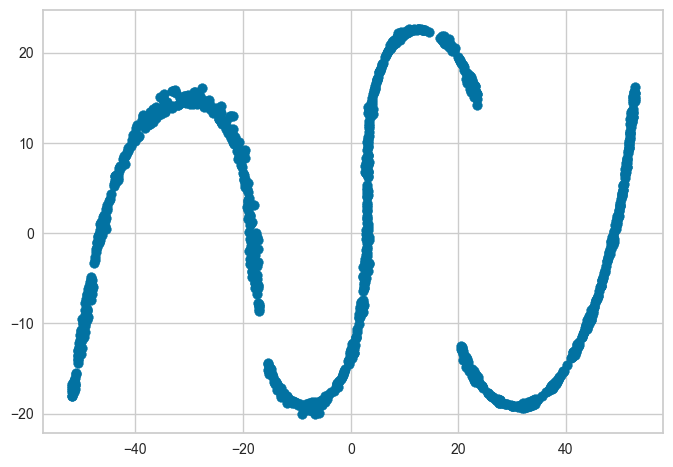

In [371]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df)
plt.scatter([feature[0] for feature in df_tsne], [feature[1] for feature in df_tsne])

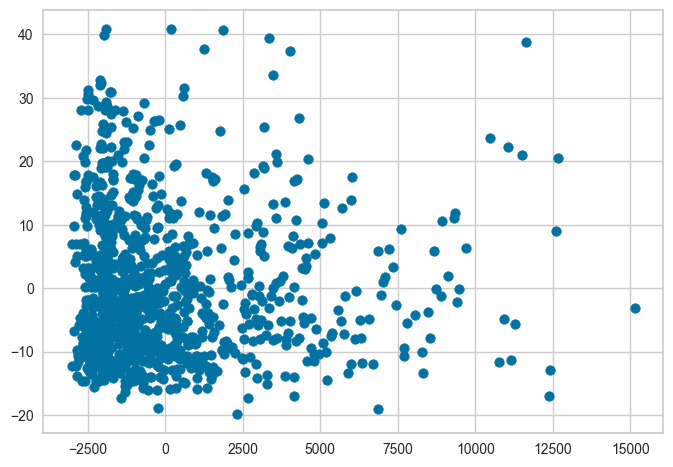

In [372]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter([feature[0] for feature in df_pca], [feature[1] for feature in df_pca])

In [417]:

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df_standardized)

# Get the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Print the results with individual variance for each feature
for i, variance in enumerate(explained_var_ratio):
    print(f"Feature {i + 1} - {variance * 100:.2f}% of variance")


Feature 1 - 21.73% of variance
Feature 2 - 15.10% of variance
Feature 3 - 11.51% of variance
Feature 4 - 11.33% of variance
Feature 5 - 10.54% of variance
Feature 6 - 9.39% of variance
Feature 7 - 9.13% of variance
Feature 8 - 7.29% of variance
Feature 9 - 3.98% of variance


**<u>After performing PCA and t-SNE</u>**

1. t-SNE:
   - from the plotted result of the t-SNE one can conclude, that the possible amount of clusters in our data is 3. However the t-SNE is not always a reliable way to find the number of clusters. It is better to use Silhouettes score or the Elbow method to define that value.
   

2. PCA:
   - There aren't features that do cause a high variance. Thus, dimentionality reduction may provide us with unexpexted, incorrect results.

## **Find clusters by using k-means, Hierachical Clustering, and DBSCAN**

## KMeans

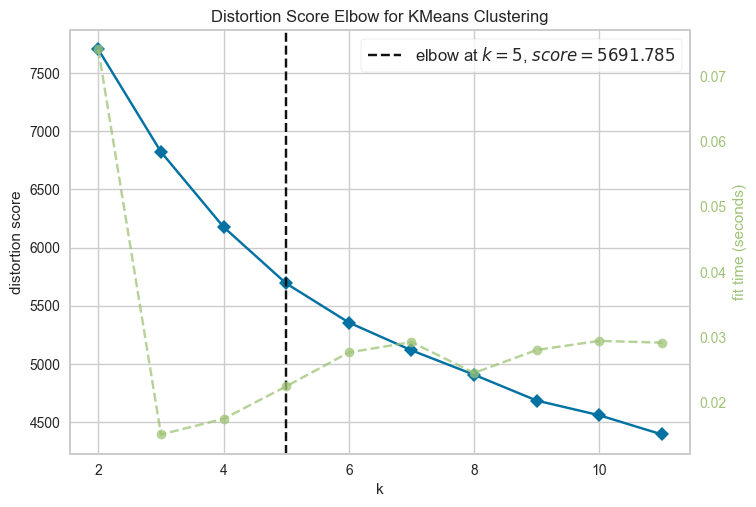

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [373]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(standardized_df)
visualizer.show()

**In terms of Elbow method, 5 - is the recommended number of clusters for the given dataset**

In [374]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for clusters in range(2, 10):
    kmeans = KMeans(n_clusters=clusters)
    kmeans_prediction = kmeans.fit_predict(standardized_df)
    silhouette_list.append(silhouette_score(df, kmeans_prediction))
print(silhouette_list)

[0.5527035495175393, 0.045431498210389845, 0.02812913871687947, 0.016431538802466422, -0.004832090114209934, -0.034964852738313054, -0.06024618627505232, -0.08140672850395142]


**However, in terms of Silhouette score, the recommended number of clusters = 2**

In [375]:
clusters2_prediction = KMeans(n_clusters=2).fit_predict(standardized_df)
clusters5_prediction = KMeans(n_clusters=5).fit_predict(standardized_df)

In [376]:
def simple_print(prediction):
    feature1 = [feature[0] for feature in df_tsne]
    feature2 = [feature[1] for feature in df_tsne]
    colors = ['red', 'blue', 'pink', 'black', 'yellow']
    for point_index in range(df.shape[0]):
        plt.scatter(feature1[point_index], feature2[point_index], color=colors[prediction[point_index]])

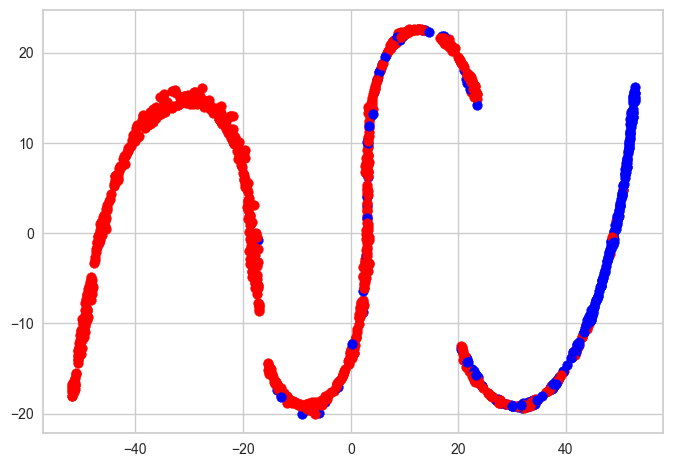

In [377]:
simple_print(clusters2_prediction)

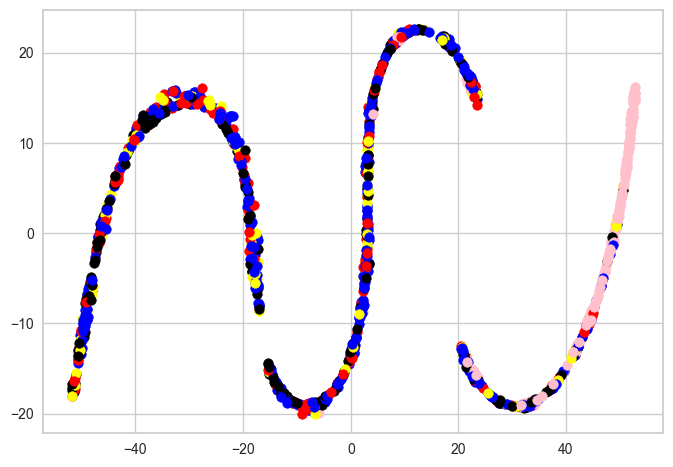

In [378]:
simple_print(clusters5_prediction)

**!!!As a result: standard scaling did not provide us with the clear results. The Silhouettes score show that the splitting is unreliable. For the n_clusters 5, the score is way is almost equal to zero. Moreover, the plotted clusters does not have any pattern and look random at all. Thus, we should try to run KMeans without scaling**

## KMeans without scaling

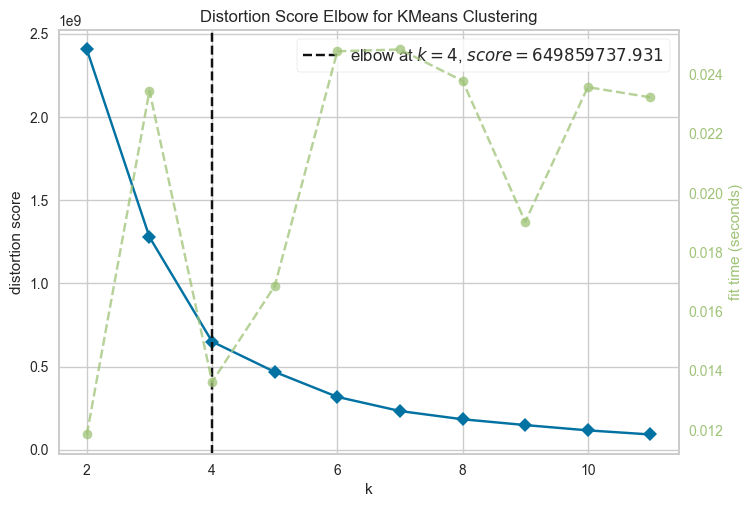

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [379]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df)
visualizer.show()

**In terms of Elbow method, 4 - is the recommended number of clusters for the given dataset**

In [380]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for clusters in range(2, 10):
    kmeans = KMeans(n_clusters=clusters)
    kmeans_prediction = kmeans.fit_predict(df)
    silhouette_list.append(silhouette_score(df, kmeans_prediction))
print(silhouette_list)

[0.7222421812298233, 0.6478640171643772, 0.6119600548325467, 0.582054381405412, 0.5778249140954397, 0.5777285004942389, 0.5697868219370066, 0.5742040500814825]


**In terms of Silhouette score, the recommended number of clusters is again 2**

In [381]:
clusters2_prediction = KMeans(n_clusters=2).fit_predict(df)
clusters4_prediction = KMeans(n_clusters=4).fit_predict(df)

In [382]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cluster1 = []
cluster2 = []
for index in range(df.shape[0]):
    if clusters2_prediction[index] == 0:
        cluster1.append(df_original.iloc[index, :].values)
    else:
        cluster2.append(df_original.iloc[index, :].values)
cluster1 = pd.DataFrame(cluster1, columns=columns)
cluster2 = pd.DataFrame(cluster2, columns=columns)

In [383]:
cluster1.describe()

,Age,Job,Credit amount,Duration
count,827.000000,827.000000,827.000000,827.000000
mean,35.292624,1.835550,2193.305925,17.970979
std,11.380561,0.627878,1177.117604,9.323050
min,19.000000,0.000000,250.000000,4.000000
25%,26.000000,2.000000,1275.000000,12.000000
50%,33.000000,2.000000,1936.000000,15.000000
75%,41.000000,2.000000,2998.500000,24.000000
max,75.000000,3.000000,5302.000000,48.000000


In [384]:
cluster2.describe()

,Age,Job,Credit amount,Duration
count,173.000000,173.000000,173.000000,173.000000
mean,36.757225,2.231214,8424.242775,34.919075
std,11.305433,0.676651,2707.327011,13.720395
min,21.000000,0.000000,5324.000000,6.000000
25%,28.000000,2.000000,6403.000000,24.000000
50%,35.000000,2.000000,7485.000000,36.000000
75%,43.000000,3.000000,9572.000000,48.000000
max,75.000000,3.000000,18424.000000,72.000000


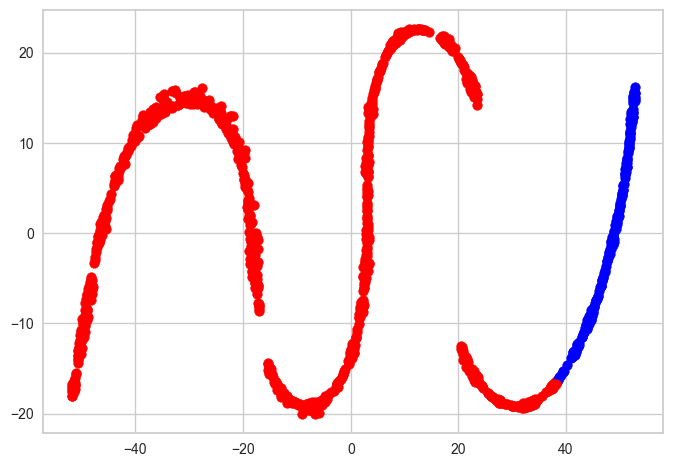

In [385]:
simple_print(clusters2_prediction)

In [386]:
def clusters_comparison(df, prediction):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'data' is your DataFrame and 'labels' are cluster labels
    data_with_labels = pd.concat([df, pd.Series(prediction, name='Cluster')], axis=1)

    num_features = len(df.columns)
    num_clusters = len(data_with_labels['Cluster'].unique())

    # Dynamically calculate the subplot grid dimensions
    rows = (num_features + 1) // 2  # Add 1 to handle odd numbers of features
    cols = 2

    plt.figure(figsize=(12, 8))
    for i, column in enumerate(df.columns):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(x='Cluster', y=column, data=data_with_labels)
        plt.title(f'Cluster-wise Box Plot for {column}')

    plt.tight_layout()
    plt.show()

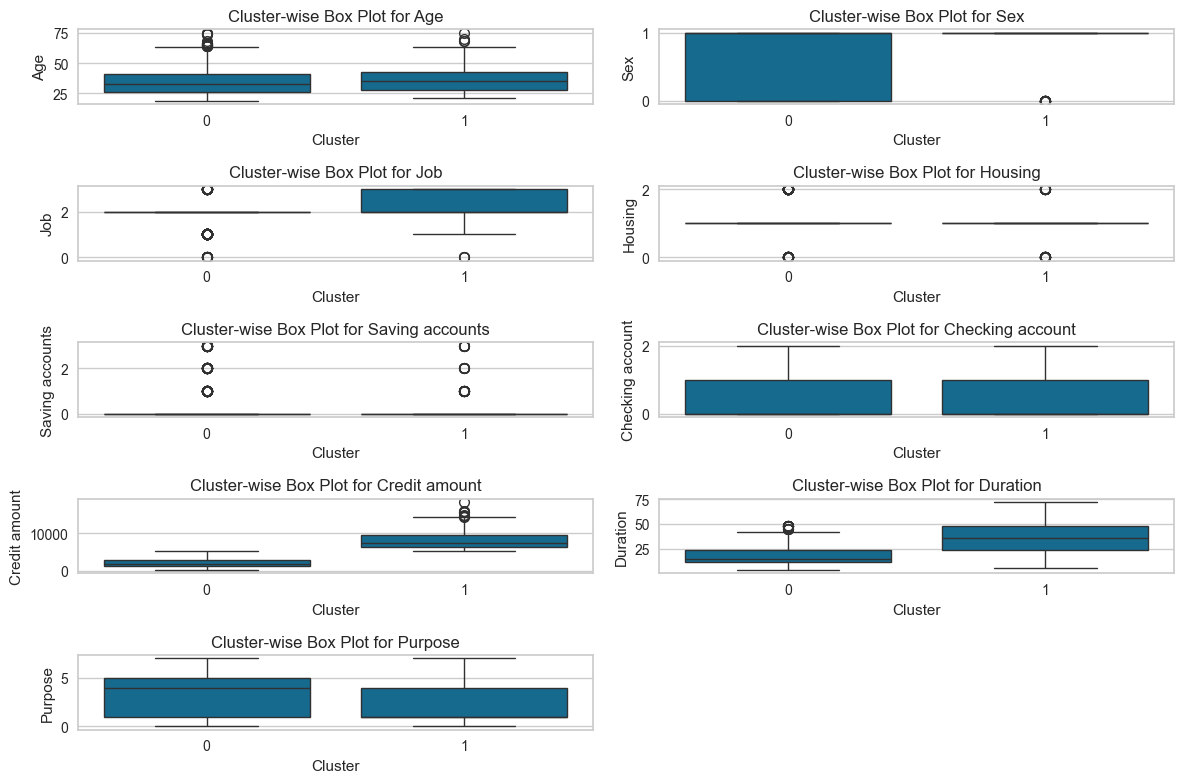

In [387]:
clusters_comparison(df, clusters2_prediction)

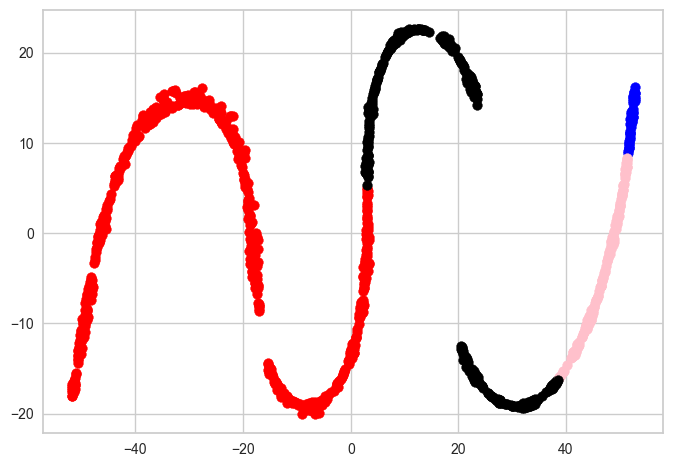

In [388]:
simple_print(clusters4_prediction)

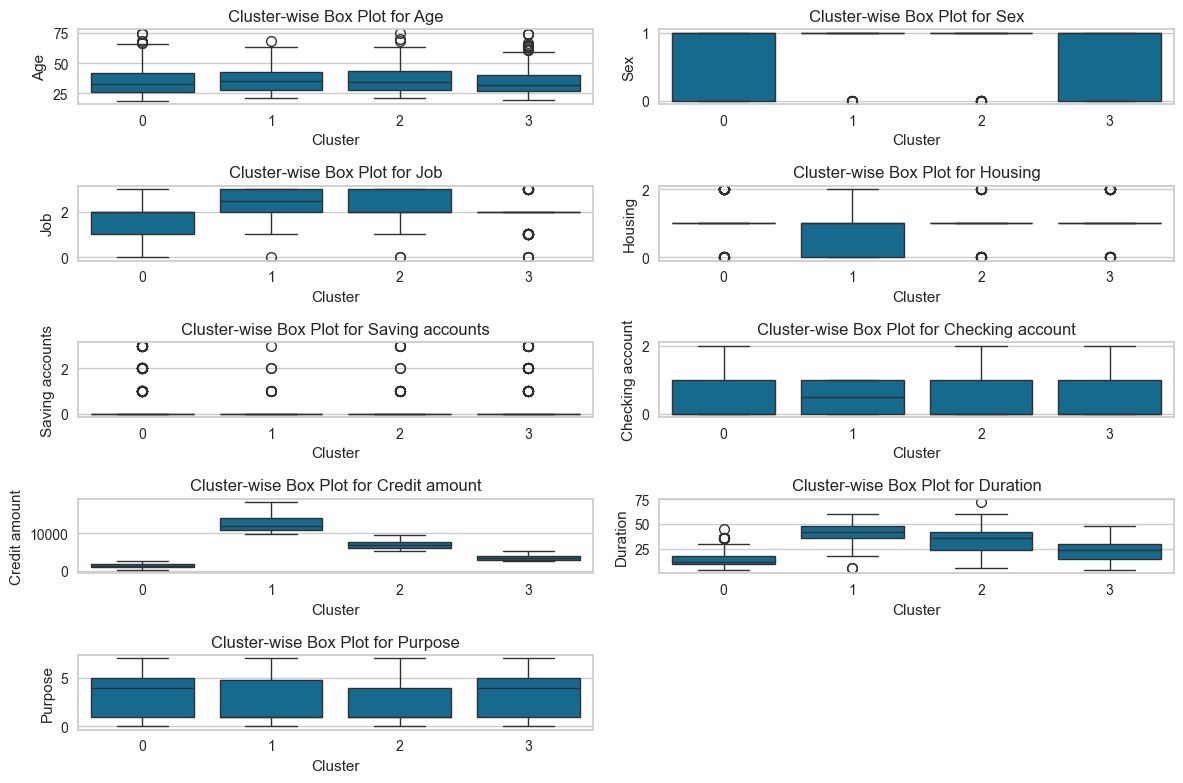

In [389]:
clusters_comparison(df, clusters4_prediction)

**<u>Results after KMeans</u>**
- Results obtained on the unscaled data are much better
- I would point out the result for the n_clusters = 2. First of all, the Silhouette's score is realtively high - 0.72. Secondly, the difference between the feature values can be observed in the box plots. The values are similar only for three features: 'Age', 'Savings account' and 'Checking account'. For other features the difference is significant. This may signify the correct formation of clusters

## Agglomerative Clustering

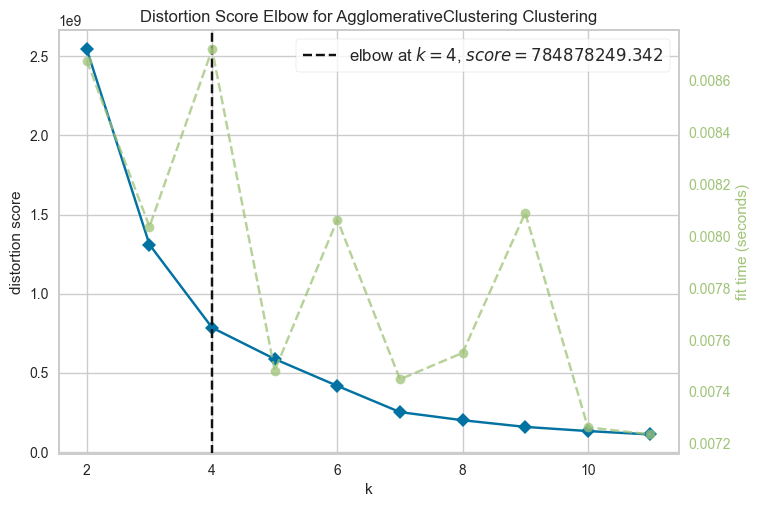

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [390]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df)
visualizer.show()

In [391]:
silhouette_list = []
for clusters in range(2, 10):
    agg = KMeans(n_clusters=clusters)
    agg_prediction = kmeans.fit_predict(df)
    silhouette_list.append(silhouette_score(df, agg_prediction))
print(silhouette_list)

[0.5742040500814825, 0.5625756092395191, 0.5603306241806101, 0.5771475519228683, 0.5771475519228683, 0.5750519218359017, 0.5741202108668207, 0.5738333993435533]


**Since Silhouettes score does not provide us with the clear intuition on the number of clusters, clustrering chosen to be done using the results of the Elbow method**

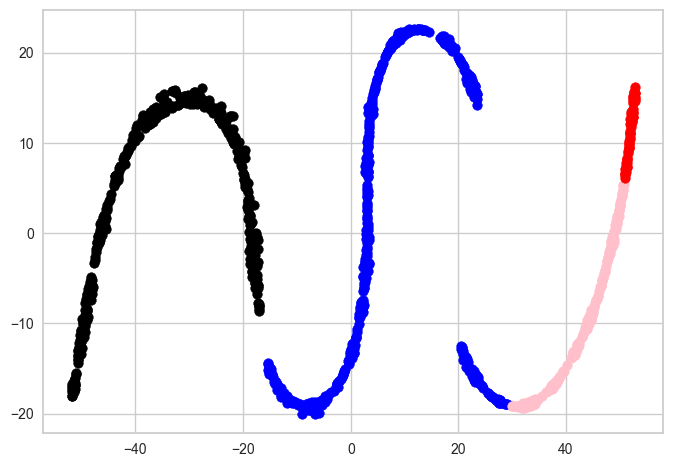

In [392]:
simple_print(AgglomerativeClustering(n_clusters=4).fit_predict(df))

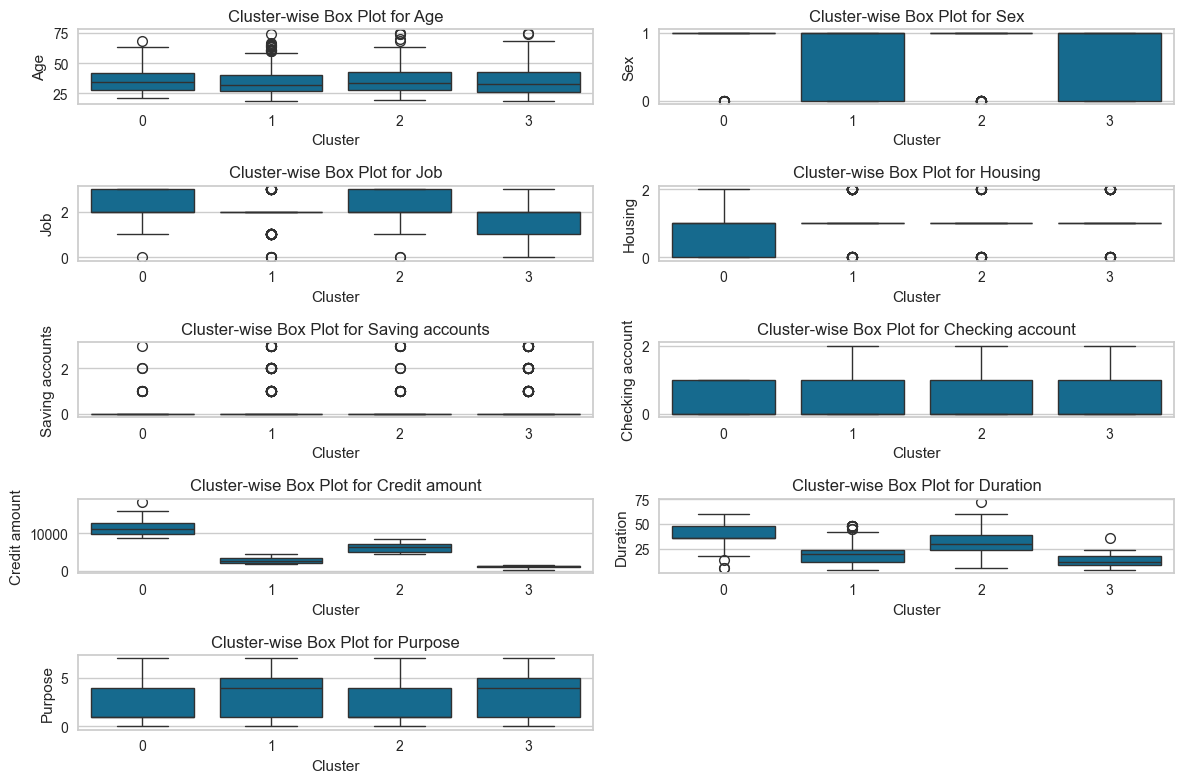

In [393]:
clusters_comparison(df, AgglomerativeClustering(n_clusters=4).fit_predict(df))

**<u>Results after Agglomerative clustering</u>**
- Elbow method was used to choose the number of clusters(n_clusters = 4)
- However, the Silhouette's score of the Agglomerative clustering in this case is only = 0.56. Which is less than in case of KMeans(0.72)
- Moreover, the box plots does not seem to prove the reliability of the splitting. The distributions of values is almost identical for many features

## DBSCAN

Iterating through the possible values for parameters(eps, min_samples) to get the best ones in terms of Silhouette's score:

In [403]:
from sklearn.model_selection import ParameterGrid

# Define parameter grid for DBSCAN with smaller steps
param_grid = {'eps': np.arange(0.1, 4.0, 0.1),
              'min_samples': np.arange(1, 10, 1)}

best_score = -1  # Initialize with a low value

# Perform grid search
for params in ParameterGrid(param_grid):
    dbscan_clusters = DBSCAN(**params).fit_predict(robusted_df)
    
    # Check if there is more than one cluster
    unique_labels = np.unique(dbscan_clusters)
    if len(unique_labels) > 1 and len(unique_labels) < 1000:
        score = silhouette_score(df, dbscan_clusters)
        
        # Update best parameters if the score is higher
        if score > best_score:
            best_score = score
            best_params = params

# Print the best parameters and silhouette score
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'eps': 2.4000000000000004, 'min_samples': 6}
Best Silhouette Score: 0.741050583297178


In [405]:
dbscan = DBSCAN(min_samples=6, eps=2.4)

dbscan_prediction = dbscan.fit_predict(robusted_df)
silhouette_score(df, dbscan_prediction)


0.741050583297178

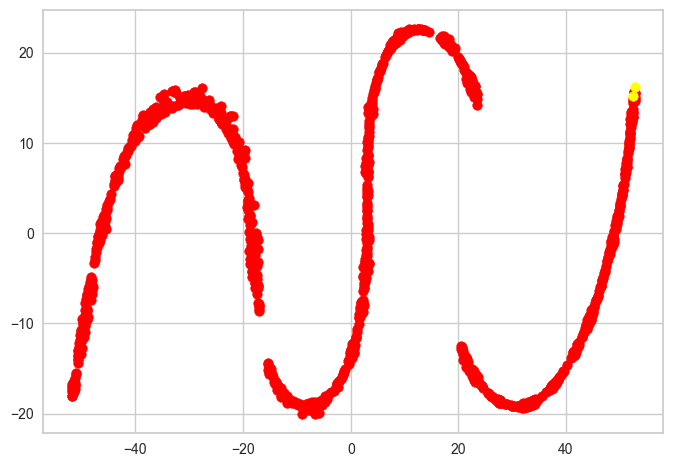

In [406]:
simple_print(dbscan_prediction)

In [397]:
print(dbscan_prediction)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [409]:
unique_labels, counts = np.unique(dbscan_prediction, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} elements")

Cluster -1: 3 elements
Cluster 0: 997 elements


**<u>Results after DBSCAN</u>**
- quite good value for Silhouette's score was reached(0.74). The clustering however is useless. Cluster1 consists of 3 elements, Cluster2 - 997.

## **Explaining results**
KMeans on unscaled data showed promising results, notably in differentiating certain features among clusters.
Other methods displayed either lower performance or issues like impractical cluster formations and imbalanced cluster sizes